**Linear Regression**

In this lab, we will learn how multiple linear regression can be implemented using Scikit- Learn, which is one of the most popular machine learning libraries for Python. The dataset we are going to use is “LaptopSales.csv”. We will make use of features of laptops to predict their sale price.

**Data Dictionary**

Configuration Index: a score based on laptop performance,higher value entails better performance

RAM (GB):Random Access Memory

Processor Speeds (GHz)

Integrated Wireless?: If the laptop has a built in wireless (Yes/No) HD Size (GB): hard drive size

Bundled Applications: a set of single software programs that are sold together. Common types of bundled software include operating systems, utilities and accessories sold with desktop or laptop computers

Retail Price: Retail price ($)

In [1]:
import pandas as pd

In [3]:
sales = pd.read_csv("LaptopSales.csv")
sales.head(5)

,Configuration Index,RAM (GB),Processor Speeds (GHz),Integrated Wireless,HD Size (GB),Bundled Applications,Retail Price
0,290,1,1.5,Yes,40,No,287
1,208,2,1.5,No,300,No,329
2,292,1,1.5,Yes,80,No,315
3,342,2,1.5,Yes,120,No,357
4,304,1,1.5,No,300,No,357


In [4]:
sales.dtypes

Configuration Index         int64
RAM (GB)                    int64
Processor Speeds (GHz)    float64
Integrated Wireless        object
HD Size (GB)                int64
Bundled Applications       object
Retail Price                int64
dtype: object

In [5]:
sales.describe()

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Retail Price
count,25649.000000,25649.000000,25649.000000,25649.000000,25649.000000
mean,371.427424,2.194121,1.910168,131.352489,370.166595
std,225.426489,1.100078,0.410171,99.101622,68.489926
min,1.000000,1.000000,1.500000,40.000000,168.000000
25%,201.000000,1.000000,1.500000,40.000000,322.000000
50%,332.000000,2.000000,2.000000,80.000000,364.000000
75%,542.000000,2.000000,2.400000,120.000000,413.000000
max,864.000000,4.000000,2.400000,300.000000,623.000000


**Let us check if there are NaN values (missing values) in this dataset. All the columns
return False value indicating that there are no missing values in this dataset.**

In [8]:
sales.isnull().any()

Configuration Index       False
RAM (GB)                  False
Processor Speeds (GHz)    False
Integrated Wireless       False
HD Size (GB)              False
Bundled Applications      False
Retail Price              False
dtype: bool

**Correlation and heatmap**

In [9]:
categorical_columns = ['Integrated Wireless', 'Bundled Applications']
# Use pd.get_dummies to convert categorical columns to dummy variables 
sales = pd.get_dummies(sales, columns=categorical_columns, drop_first=True)

# Now you can calculate correlation
corr = sales.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

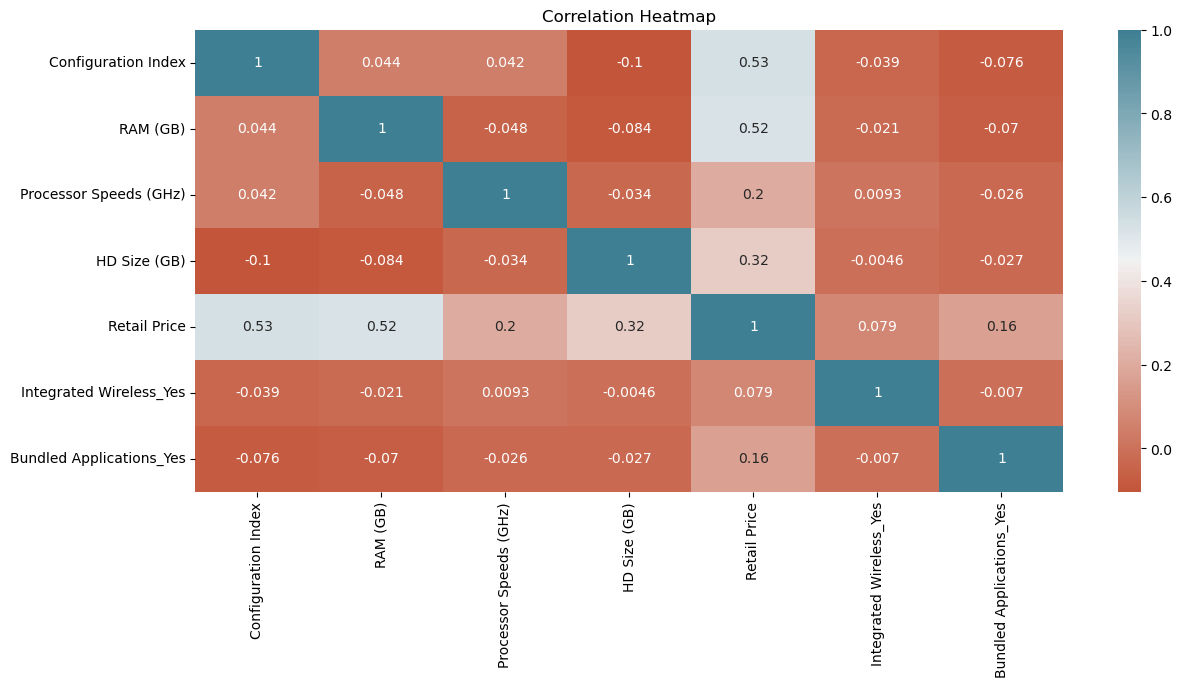

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot = True,cmap = sns.diverging_palette(20, 220, n=200)) 
plt.title('Correlation Heatmap')

In [12]:
sales

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Retail Price,Integrated Wireless_Yes,Bundled Applications_Yes
0,290,1,1.5,40,287,True,False
1,208,2,1.5,300,329,False,False
2,292,1,1.5,80,315,True,False
3,342,2,1.5,120,357,True,False
4,304,1,1.5,300,357,False,False
...,...,...,...,...,...,...,...
25644,479,1,2.4,300,413,False,True
25645,589,1,1.5,120,350,False,True
25646,731,1,1.5,80,392,False,True
25647,375,2,2.4,300,441,True,True


In [13]:
sales['Integrated Wireless_Yes'] = sales['Integrated Wireless_Yes'].astype(int)
sales['Bundled Applications_Yes'] = sales['Bundled Applications_Yes'].astype(int)

# Convert all columns to numeric and handle missing values
sales = sales.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values if needed
sales = sales.dropna()

**Next step is to divide the data into “attributes” and “labels”. X variable contains all
the attributes/features and y variable contains the target variable.**

In [14]:
X = sales.drop(['Retail Price'], axis=1)
y = sales[['Retail Price']]

In [15]:
X

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Integrated Wireless_Yes,Bundled Applications_Yes
0,290,1,1.5,40,1,0
1,208,2,1.5,300,0,0
2,292,1,1.5,80,1,0
3,342,2,1.5,120,1,0
4,304,1,1.5,300,0,0
...,...,...,...,...,...,...
25644,479,1,2.4,300,0,1
25645,589,1,1.5,120,0,1
25646,731,1,1.5,80,0,1
25647,375,2,2.4,300,1,1


In [17]:
y

,Retail Price
0,287
1,329
2,315
3,357
4,357
...,...
25644,413
25645,350
25646,392
25647,441


**Now we are going to split the data into training set and test set, We will use 80% of
the data as the training set and the rest 20% of the data as test set.**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) 
X_train.shape

X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

Now we are ready to train a linear regression model on the training set and estimate
the coeﬀicients.

In [21]:
from sklearn.linear_model import LinearRegression
sales_regressor = LinearRegression()
sales_regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(sales_regressor.coef_, columns= X.columns) 
coeff_df

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Integrated Wireless_Yes,Bundled Applications_Yes
0,0.173125,34.974064,38.247655,0.304455,15.538897,35.992358


In [22]:
print(X_train.dtypes)
print(y_train.dtypes)

Configuration Index           int64
RAM (GB)                      int64
Processor Speeds (GHz)      float64
HD Size (GB)                  int64
Integrated Wireless_Yes       int64
Bundled Applications_Yes      int64
dtype: object
Retail Price    int64
dtype: object


In [23]:
import pandas as pd
import statsmodels.api as sm
# Add a constant column to X
X = sm.add_constant(X)
# Fit the OLS model
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Retail Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 2.156e+04
Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                        04:12:53   Log-Likelihood:            -1.2173e+05
No. Observations:               25649   AIC:                         2.435e+05
Df Residuals:                   25642   BIC:                         2.435e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Evaluate the linear regression model**

In [24]:
y_train_pred = sales_regressor.predict(X_train)
y_test_pred = sales_regressor.predict(X_test)

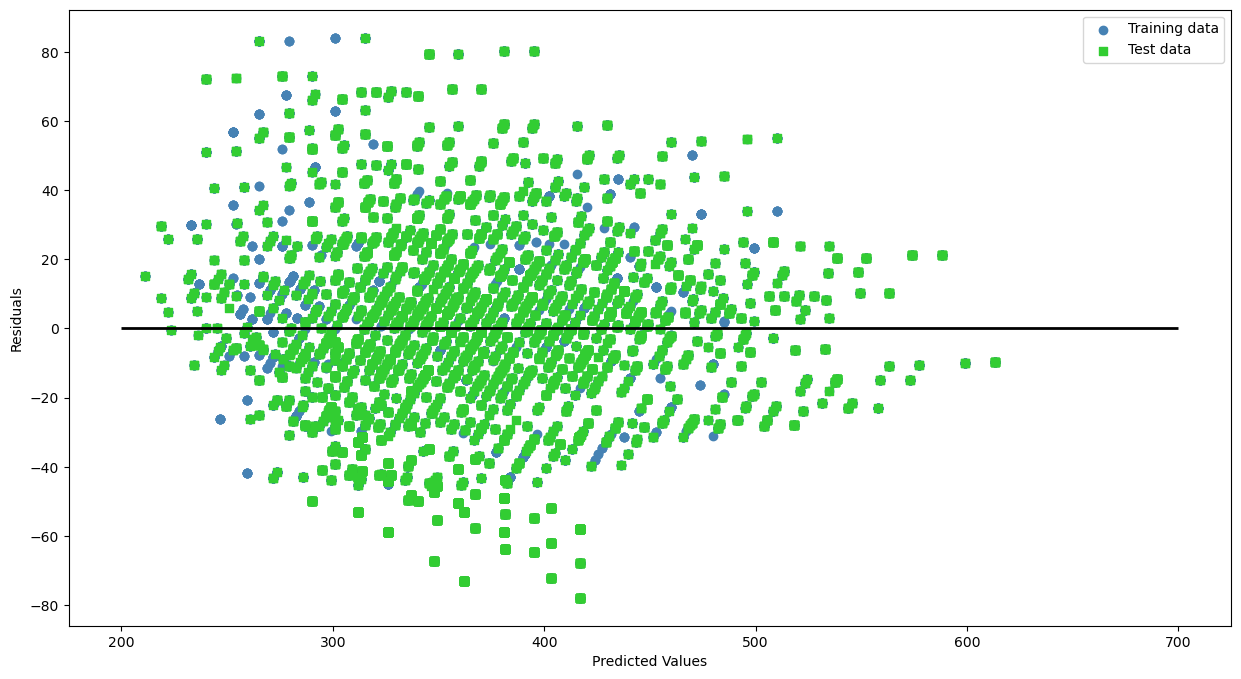

In [26]:
plt.figure(figsize = (15,8))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker = 'o',label = "Training data")
plt.scatter(y_test_pred, y_test_pred-y_test, color = 'limegreen', marker ='s',label='Test data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc = 'upper right')
plt.hlines(y = 0,xmin = 200, xmax = 700, color = 'black', lw =2) 
plt.show()

For regression algorithms, we can use three evaluation metrics to evalute model performance:
1. Mean Squared Error (MSE) is the mean of the squared errors
2. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [29]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error on Test Data:', metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Absolute Error on Training Data:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error on Test Data:', metrics.mean_squared_error(y_test,y_test_pred))
print('Mean Squared Error on Training Data:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Root Mean Squared Error on Training Data:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error on Test Data: 21.591106737958835
Mean Absolute Error on Training Data: 21.76019884883131
Mean Squared Error on Test Data: 768.2924424521249
Mean Squared Error on Training Data: 777.9861978009391
Root Mean Squared Error on Test Data: 27.718088722928297
Root Mean Squared Error on Training Data: 27.892403944460202


In [30]:
from sklearn.metrics import r2_score
r_sq_test = r2_score(y_test, y_test_pred) 
r_sq_train = r2_score(y_train, y_train_pred) 
print('R squared on test set:', r_sq_test) 
print('R squared on training set:', r_sq_train)

R squared on test set: 0.8323889325785554
R squared on training set: 0.8350651328238885
